# **Data Summary & Statistical Analysis on Diabetes**

### **Loading Data**

In [297]:
import numpy as np
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Preview Dataset**

In [298]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Statistical Inference with Confidence Intervals**

The confidence interval is a range of reasonable values of Parameter of Interest. We calculate lower confidence bound and upper confidence bound; the Center of lcb, ucb is the best point estimate. 95% confidence level refers to our confidence in the statistical procedure used to make this interval.

If 95% of the confidence interval is there, when we draw 100 samples from the population and make intervals on these 100 samples, then we would expect 95 intervals to contain accurate population inference.

**Why Confidence Intervals?**

Confidence intervals are a calculated range or boundary around a parameter, or a statistic supported mathematically with a certain level of confidence. For example, in the lecture, we estimated, with 95% confidence, that the population proportion of parents with a toddler that uses a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.

This is different than having a 95% probability that the proper population proportion is within our confidence interval.
Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

**How are Confidence Intervals Calculated?**

Our equation for calculating confidence intervals is as follows:


 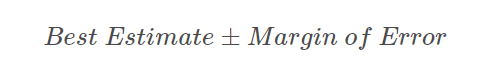
 
Where the Best Estimate is the observed population proportion or mean and the Margin of Error is the t-multiplier.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level. For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

 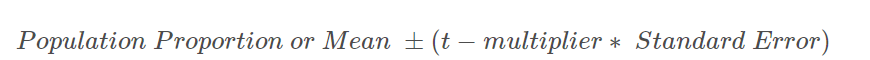
 
Lastly, the Standard Error is calculated differenly for population proportion and mean:
 
 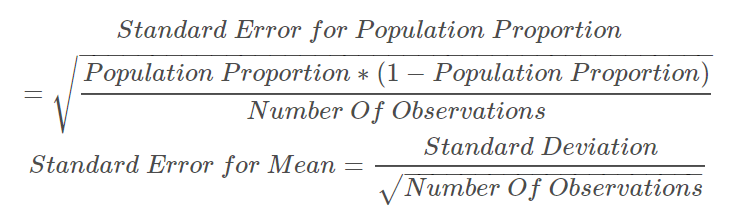

There are few assumption for finding confidence interval. I am assuming that dataset provided is holding true to those assumptions

1) Samples are SRS(Simple Random Sampling)->(Every observation in Population have equal chance of being selected)

2) Normality (Distribution of desired variable is normal)

3) If in case distribution of some parameter of interest is not distributed normal, we may assume normallity using Central Limit Theorem, Larger sample size ==> Normality 

## **The proportion of people who report they have diabetes**

In [300]:
data.Outcome.replace({0:'Non-Diab',1:'Diab'},inplace=True)
print(data.Outcome.value_counts())

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64


In [301]:
class Proportion:
    def __init__(self,n_yes,n,x):   #X multiplier from appropriate distribution based on desired confidence level and sample design
        self.n_yes=n_yes
        self.n=n
        self.x=x
        self.best_estimate = round(n_yes/n,2)
        
    def estimated_standard_error(self):
        import numpy as np
        return np.sqrt((self.best_estimate*(1-self.best_estimate))/self.n)
    
    def margin_of_error(self):
        return self.x*self.estimated_standard_error()

    def proportion(self):
        lcb=self.best_estimate-(self.x*self.estimated_standard_error())
        ucb=self.best_estimate+(self.x*self.estimated_standard_error())
        return (lcb,ucb)

In [302]:
n=data.shape[0]
diabetic=data.Outcome.value_counts().loc['Diab']
print("\nTotal Observation->",n,"\t","Diabetic Patient Number->",diabetic,"\n")
diab_pro=Proportion(diabetic, n ,1.96)  # using z=1.96 for 95% C.I here.


Total Observation-> 768 	 Diabetic Patient Number-> 268 



In [303]:
print("\nBest Point Estimate for Proportion of People with Diabetes =",diab_pro.best_estimate*100)
print("\nEstimated Standard Error for Proportion of People with Diabetes =", diab_pro.estimated_standard_error())
print("\nMargin of Error is for Proportion of People with Diabetes =", diab_pro.margin_of_error())
print("\n95% Confidence Interval for Proportion of People with Diabetes =", diab_pro.proportion(),"\n")


Best Point Estimate for Proportion of People with Diabetes = 35.0

Estimated Standard Error for Proportion of People with Diabetes = 0.017211157960269067

Margin of Error is for Proportion of People with Diabetes = 0.03373386960212737

95% Confidence Interval for Proportion of People with Diabetes = (0.3162661303978726, 0.38373386960212735) 



In [304]:
import statsmodels.api as sm
print("\n95% Confidence interval with the statsmodels library ->",sm.stats.proportion_confint(diabetic, n),"\n")


95% Confidence interval with the statsmodels library -> (0.3152483405027714, 0.38266832616389523) 



**Interpreting Confidence Interval about Proportion of People with Diabetes**

With 95% confidence, the population proportion of people having diabetes is estimated to be between 31.52% - 38.26%.

## **Average month of Pregnancy for Patients with diabetes**

Population is all Patients with Diabetes

Parameter of Interest is the Population Mean Pregnancy Month of Patients with diabetes.

In [305]:
data_diabetic = data[data.Outcome=='Diab']
data_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
4,0,137,40,35,168,43.1,2.288,33,Diab
6,3,78,50,32,88,31.0,0.248,26,Diab
8,2,197,70,45,543,30.5,0.158,53,Diab


In [306]:
mean_preg_diab=Mean(data_diabetic['Pregnancies'].mean(),data_diabetic['Pregnancies'].std(),data_diabetic.shape[0],1.962)

In [307]:
print("Best point estimate for Mean Pregnancy Month of Patients with Diabetes ->", mean_preg_diab.best_estimate)
print("\nEstimated Standard Error for Mean Pregnancy Month of Patients with Diabetes ->",mean_preg_diab.estimated_se)
print("\nMargin of Error for Mean Pregnancy Month of Patients with Diabetes ->",mean_preg_diab.moe())
print("\n95% Confidence Interval for Mean Pregnancy Month of Patients with Diabetes ->",mean_preg_diab.mean(),"\n")

Best point estimate for Mean Pregnancy Month of Patients with diabetes -> 4.865671641791045

Estimated Standard Error for Mean Pregnancy Month of Patients with diabetes -> 0.2285325476073356

Margin of Error for Mean Pregnancy Month of Patients with diabetes -> 0.44838085840559244

95% Confidence Interval for Mean Pregnancy Month of Patients with diabetes -> (4.417290783385453, 5.314052500196637) 



In [308]:
print("\n95% C.I. with the statsmodels library ->",sm.stats.DescrStatsW(data_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with the statsmodels library -> (4.417756079185482, 5.313587204396608)


In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')
%matplotlib inline

**Pregnancies Distribution for Diabetic Patients**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


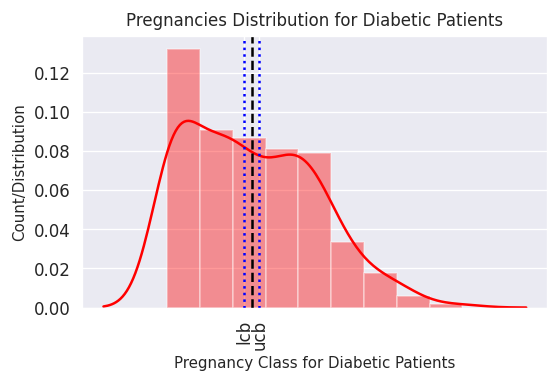

In [310]:
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(data_diabetic['Pregnancies'],color='red')
plt.axvline(x=4.417756079185482,color='blue',ls=':')
plt.axvline(x=5.313587204396608,color='blue',ls=':')
plt.axvline(x=mean_preg_diab.best_estimate,color='black',ls='--')
plt.xticks([4.417756079185482,5.313587204396608],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Diabetic Patients',fontdict={'fontsize':9})
plt.ylabel('Count/Distribution',fontdict={'fontsize':9})
plt.title('Pregnancies Distribution for Diabetic Patients',fontdict={'fontsize':10}) 
plt.show()

**Interpretation**

With 95% confidence, the population mean Pregnancies for all Patients with Diabetes is estimated to be between 4.417 months and 5.314 months.
Note that our Best Point Estimate is center of our confidence intervale.

## **Average month of Pregnancy for non diabetic patients**

Population is all Non diabetic patients

Parameter of Interest is the Population Mean Pregnancy Month for non diabetic patients.

In [311]:
data_non_diabetic=data[data.Outcome=='Non-Diab']
data_non_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
5,5,116,74,0,0,25.6,0.201,30,Non-Diab
7,10,115,0,0,0,35.3,0.134,29,Non-Diab
10,4,110,92,0,0,37.6,0.191,30,Non-Diab


In [312]:
mean_preg_non_diab = Mean(data_non_diabetic['Pregnancies'].mean(),data_non_diabetic['Pregnancies'].std(),data_non_diabetic.shape[0],1.962)

In [313]:
print("\nBest point estimate for Mean Pregnancy Month of non diabetic patients ->", mean_preg_non_diab.best_estimate)
print("\nEstimated Standard Error for Mean Pregnancy Month of non diabetic patients ->",mean_preg_non_diab.estimated_se)
print("\nMargin of Error for Mean Pregnancy Month of non diabetic patients ->",mean_preg_non_diab.moe())
print("\n95% Confidence Interval for Mean Pregnancy Month of non diabetic patients -> ",mean_preg_non_diab.mean(),"\n")


Best point estimate for Mean Pregnancy Month of non diabetic patients -> 3.298

Estimated Standard Error for Mean Pregnancy Month of non diabetic patients -> 0.13493259654813752

Margin of Error for Mean Pregnancy Month of non diabetic patients -> 0.2647377544274458

95% Confidence Interval for Mean Pregnancy Month of non diabetic patients ->  (3.0332622455725544, 3.5627377544274457) 



In [314]:
print("\n95% C.I. with statsmodels library ->",sm.stats.DescrStatsW(data_non_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library -> (3.033536970425177, 3.562463029574823)


**Pregnancies Distribution for Non Diabetic Patients** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


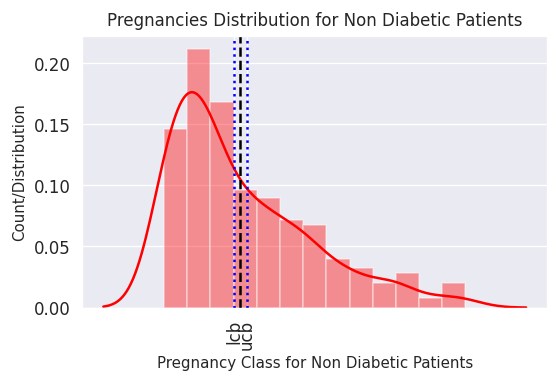

In [315]:
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(data_non_diabetic['Pregnancies'],color='red')
plt.axvline(x=3.033536970425177,color='blue',ls=':')
plt.axvline(x=3.562463029574823,color='blue',ls=':')
plt.axvline(x=mean_preg_non_diab.best_estimate,color='black',ls='--')
plt.xticks([3.033536970425177, 3.562463029574823],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Non Diabetic Patients',fontdict={'fontsize':9})
plt.ylabel('Count/Distribution',fontdict={'fontsize':9})
plt.title('Pregnancies Distribution for Non Diabetic Patients',fontdict={'fontsize':10}) 
plt.show()

**Interpretation**

With 95% confidence, the population mean Pregnancies for all non diabetic Patients is estimated to be between 3.033 months and 3.562 months.
It can be observed that our Best Point Estimate is center of our confidence intervale.

## **Difference in mean pregnancies month of diabetic and non-diabetic patients**

Parameter of Interest -> (μ1 − μ2 ): Pregnancies Month

where:

μ1-> Mean pregnancies month of Diabetic Patients.

μ1-> Mean pregnancies month of Non-Diabetic Patients.

There is two approach to calculate mean difference confidence interval :-

1) Pooled Approach

2) Un-pooled approach

**Pooled Approach** The variance of the two populations are assumed to be equal for both groups

**Unpooled Approach** The assumption of equal variances is dropped

Let us find out which approach we can use.

In [316]:
print("\nSample Information-")
df.groupby('Outcome').describe()['Pregnancies'].transpose().loc[['mean','std'],:]


Sample Information-


Outcome,Diab,Non-Diab
mean,4.865672,3.298000
std,3.741239,3.017185


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

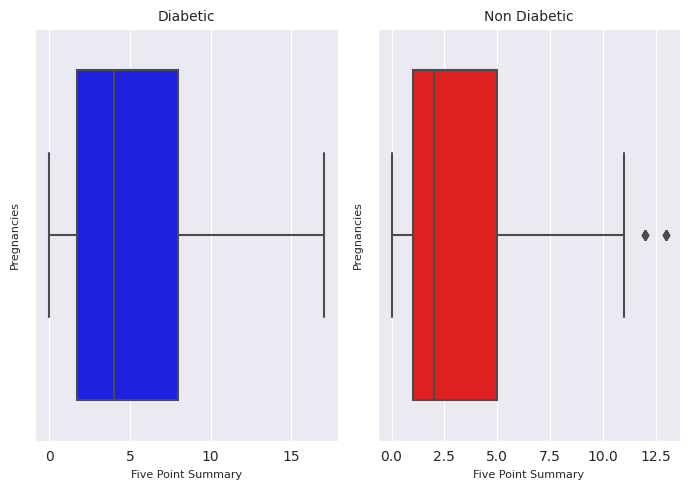

In [317]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=100,figsize = (7,5))

plot0 = sns.boxplot(data_diabetic['Pregnancies'],ax=axes[0],orient='v',color= 'blue')
axes[0].set_title('Diabetic',fontdict={'fontsize':10})
axes[0].set_xlabel('Five Point Summary',fontdict={'fontsize':8})
axes[0].set_ylabel('Pregnancies',fontdict={'fontsize':8})
plt.tight_layout()

plot1 = sns.boxplot(data_non_diabetic['Pregnancies'],ax=axes[1],orient='v',color='red')
axes[1].set_title('Non Diabetic',fontdict={'fontsize':10})
axes[1].set_xlabel('Five Point Summary',fontdict={'fontsize':8})
axes[1].set_ylabel('Pregnancies',fontdict={'fontsize':8})
plt.tight_layout()

Variance of both diabetic and non diabetic patients are nearly similar or IQR is also almost same. Thus we can proceed with Pooled approach.

In [318]:
x1 = data_diabetic.Pregnancies.mean()
x2 = data_non_diabetic.Pregnancies.mean()
std1 = data_diabetic.Pregnancies.std()
std2 = data_non_diabetic.Pregnancies.std()
n1 = data_diabetic.shape[0]
n2 = data_non_diabetic.shape[0]

In [319]:
class diffMean:
    import numpy as np
    def __init__(self,x1,x2,std1,std2,n1,n2,t):    #t multiplier comes from t distribution with appropriate degree of freedom'''        
        self.best_estimate1=x1
        self.best_estimate2=x2
        self.std1=std1
        self.std2=std2
        self.n1=n1
        self.n2=n2
        self.t=t
        self.pooled_estimated_se = np.sqrt((np.sqrt(((self.n1-1)*(self.std1**2) + (self.n2-1)*(self.std2**2)) / ((self.n1+self.n2)-2))) * (np.sqrt((1/self.n1)+(1/self.n2))))
        self.unpooled_estimated_se = np.sqrt(((self.std1**2)/self.n1) + ((self.std2**2)/self.n2))
        
    def pooledMoe(self):
        return (self.t)*(self.pooled_estimated_se)
    
    def pooledMean(self):
        lcb=(self.best_estimate1-self.best_estimate2)-self.pooledMoe()
        ucb=(self.best_estimate1-self.best_estimate2)+self.pooledMoe()
        return (lcb,ucb)
    
    def unpooledMoe(self):
        return self.t*self.unpooled_estimated_se
    
    def unpooledMean(self):
        lcb=(self.best_estimate1-self.best_estimate2)-self.unpooledMoe()
        ucb=(self.best_estimate1-self.best_estimate2)+self.unpooledMoe()
        return (lcb,ucb)

In [320]:
mean_diff_preg = diffMean(x1,x2,std1,std2,n1,n2,1.98)

In [321]:
mean_diff_preg.pooledMean()

(0.579854475792106, 2.5554888077899838)

In [322]:
print("Best point estimate for (μ1-μ2): Pregnancies Month =",(mean_diff_preg.best_estimate1-mean_diff_preg.best_estimate2))
print("\nEstimated Standard Error for (μ1-μ2): Pregnancies Month =",mean_diff_preg.pooled_estimated_se)
print("\nMargin of Error for (μ1-μ2): Pregnancies Month =",mean_diff_preg.pooledMoe())
print("\n95% Confidence Interval for (μ1-μ2): Pregnancies Month =",mean_diff_preg.pooledMean(),"\n")

Best point estimate for (μ1-μ2): Pregnancies Month = 1.567671641791045

Estimated Standard Error for (μ1-μ2): Pregnancies Month = 0.4988975585853227

Margin of Error for (μ1-μ2): Pregnancies Month = 0.987817165998939

95% Confidence Interval for (μ1-μ2): Pregnancies Month = (0.579854475792106, 2.5554888077899838) 



**Interpretation**

With 95% confidence, the difference in mean Pregnancies Month between diabetic and non-diabetic patients is estimated to be between 0.5798 month and 2.5554 month.

## **Comparision between mean pregnancies month of Diabetic and Non Diabetic Patients**

Population-> Diabetic and Non-Diabetic Patients

Parameter of Interest-> (μ1 − μ2 ): Pregnancies Month

μ1-> Mean pregnancies month of Diabetic Patients.

μ1-> Mean pregnancies month of Non-Diabetic Patients.

Null: There is no difference in mean Pregnancy Month

Alternative: There is a significant difference in mean Pregnancy Month

Let us consider the significance Level = 5%

The difference in the mean Pregnancy Month between Diabetic and Non-Diabetic Patients can be found out by calculating the p-value.

### **P-value**

In statistical hypothesis testing, the p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. It is used to decide whether an alternative hypothesis can be accepted or not.

So now say that we have put a significance (α)=0.05.
This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true.

In [323]:
import statsmodels.api as sm
z,p_value = sm.stats.ztest(data_diabetic['Pregnancies'],data_non_diabetic['Pregnancies'])
print("P-Value is ==> ",p_value)

P-Value is ==>  3.006743856829293e-10


Our p-value is smaller than the 0.05 significance level, which means there is strong evidence against the null.

Thus, we can reject the null!

Based on our estimated difference in sample means, we support that there is a significant difference between the population mean Pregnancy month for diabetic and non diabetic patients.


---

